# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Reyana Hilda Arti
- **Email:** h1091201022@student.untan.ac.id
- **ID Dicoding:** reyanahld

## Menentukan Pertanyaan Bisnis

- Apakah terjadi peningkatan pada jumlah penyewaan sepeda dari tahun 2011-2012?
- Berapa persen pengguna yang sudah terdaftar dan tidak dari keseluruhan pengguna?
- Pada hari apa pengguna paling banyak menggunakan penyewaan sepeda?
- Pada musim apa pengguna paling banyak menggunakan penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Import Data Hour dari Dataset Bike-Share

In [146]:
hour_df = pd.read_csv("D:\Bangkit 2024 - ML\Project dan Tugas\Submission Belajar Analis Data dengan Python\Bike-sharing-dataset\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Import Data Day dari Dataset Bike-Share

In [147]:
day_df = pd.read_csv("D:\Bangkit 2024 - ML\Project dan Tugas\Submission Belajar Analis Data dengan Python\Bike-sharing-dataset\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Assessing data Hour

In [150]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari output di atas, didapat kesimpulan bahwa tidak ada perbedaan jumlah dalam variabel, namun terdapat kesalahan
tipe data variabel "dteday" yang seharusnya datetime bukan object. Selain itu, data season, yr, mnth, holiday,weekday, weathersit, dan workingday juga sebaiknya diubah ke bentuk data kategori agar memudahkan analisis.

In [155]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari output di atas dapat disimpulkan tidak ada data missing pada data hour_df

In [156]:
hour_df.duplicated().sum()

0

Dari output di atsa dapat dilihat pula tidak ada data duplikat pada data hour_df

In [157]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari output di atas dapat dilihat pula tidak ada keanehan pada statistik deskriptif data hour_df

#### Assessing data Day

In [158]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


sama seperti data hour, pada data day juga tidak memiliki perbedaan pada jumlah data pada tiap variabel, namun
ada kesalahan tipe data "dteday" yang harusnya datetime bukan object. Selain itu, data season, yr, mnth, holiday,weekday, weathersit, dan workingday juga sebaiknya diubah ke bentuk data kategori agar memudahkan analisis.

In [159]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari output di atas dapat dilihat bahwa data day bebas dari data missing

In [160]:
day_df.duplicated().sum()

0

Dari output di atas dapat dilihat bahwa data day bebas dari data duplikat

In [161]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari output di atas dapat dilihat bahwa tidak ada keanehan pada statistik deskriptif data day_df

### Cleaning Data

Pertama kita akan mengubah tipe data "dteday" dari object ke datetime dengan code dibawah ini:

In [36]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [37]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [38]:
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dapat dilihat dari kedua output, tipe data "dteday" sudah berubah menjadi datetime

Berikutnya kita mengubah tipe data variabel season, yr, mnth, holiday, weekday, weathersit, dan workingday menjadi tipe 'category'

In [162]:
columns = ['season','yr', 'mnth', 'holiday', 'weekday', 'weathersit','workingday']
 
for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

In [163]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  int64   
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(7), float64(4), int64(5), object(1)
memory usage: 1.4+ MB


In [164]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    category
 4   mnth        731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  cnt         731 non-null    int64   
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 57.9+ KB


Dapat dilihat bahwa tipe data variabel season, yr, mnth, holiday, weekday, weathersit, dan workingday pada data hour_df dan day_df sudah berubah menjadi 'category'

Berikutnya kita akan mengubah isi data variabel kategori pada data hour_df dan day_df sesuai dengan keterangan yang sebenarnya agar memudahkan proses analisis

In [167]:
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov','Des'), inplace=True)
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov','Des'), inplace=True)

hour_df.weathersit.replace((1,2,3,4), ('Clear', 'Misty_Cloudy', 'Light_RainSnow','Heavy_RainSnow'), inplace=True)
day_df.weathersit.replace((1,2,3,4), ('Clear', 'Misty_Cloudy', 'Light_RainSnow','Heavy_RainSnow'), inplace=True)

hour_df.yr.replace((0,1),('2011','2012'), inplace=True)
day_df.yr.replace((0,1), ('2011','2012'), inplace=True)

hour_df.holiday.replace((0,1), ('Holiday', 'Not_Holiday'), inplace=True)
day_df.holiday.replace((0,1), ('Holiday', 'Not_Holiday'), inplace=True)

hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

hour_df.workingday.replace((0,1), ('Workingday',"Not_workingday"), inplace=True)
day_df.workingday.replace((0,1), ('Workingday',"Not_workingday"), inplace=True)

In [168]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Holiday,Saturday,Workingday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,Holiday,Saturday,Workingday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,Holiday,Saturday,Workingday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,Holiday,Saturday,Workingday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,Holiday,Saturday,Workingday,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [169]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,Holiday,Saturday,Workingday,Misty_Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,Holiday,Sunday,Workingday,Misty_Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,Holiday,Monday,Not_workingday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,Holiday,Tuesday,Not_workingday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,Holiday,Wednesday,Not_workingday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dapat dilihat data dalam variabel kategori pada data hour_df dan day_df sudah berubah sesuai dengan keterangan sebenarnya

## Exploratory Data Analysis (EDA)

### Explore Hour_df

Mengelompokkan jumlah penyewaan sepeda berdasarkan jam :

In [120]:
hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=False)

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

Berdasarkan output di atas, dapat dilihat bahwa pengguna paling banyak menggunakan penyewaan sepeda pada jam 17.00 dan paling sedikit pada jam 04.00

Mengelompokkan jumlah penyewaan sepeda berdasarkan musim :

In [119]:
hour_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64

Dari output di atas dapat dilihat bahwa jumlah penyewaan sepeda paling banyak terjadi pada musim gugur atau Fall, sedangkan penyewaan paling sedikit terjadi pada musim semi atau Spring

Mengelompokkan jumlah penyewaan berdasarkan tahun:

In [118]:
hour_df.groupby(by="yr").cnt.sum().sort_values(ascending=False)

yr
2012    2049576
2011    1243103
Name: cnt, dtype: int64

Berdasarkan output di atas, dapat dilihat bahwa penyewaan pada tahun 2012 lebih banyak dibanding 2011, hal ini berarti bisnis penyewaan sudah mengalami kemajuan

Mengelompokkan jumlah penyewaan berdasarkan hari libur/tidak :

In [117]:
hour_df.groupby(by="holiday").cnt.sum().sort_values(ascending=False)

holiday
Holiday        3214244
Not_Holiday      78435
Name: cnt, dtype: int64

Dari output di atas dapat dilihat bahwa jumlah penyewaan paling banyak terjadi pada hari libur

Mengelompokkan jumlah penyewaan berdasarkan hari:

In [116]:
hour_df.groupby(by="weekday").cnt.sum().sort_values(ascending=False)

weekday
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Monday       455503
Sunday       444027
Name: cnt, dtype: int64

Dari output di atas dapat dilihat bahwa penyewaan sepeda terbanyak terjadi pada hari Jumat.

Mengelompokkan jumlah penyewaan sepeda berdasarkan hari bekerja/tidak.

In [115]:
hour_df.groupby(by="workingday").cnt.sum().sort_values(ascending=False)

workingday
Not_workingday    2292410
Workingday        1000269
Name: cnt, dtype: int64

Dari output di atas dapat dilihat bahwa penyewaan sepeda terbanyak ada pada hari tidak bekerja, hal ini selaras dengan output sebelum ini yaitu penyewaan sepeda terbanyak terjadi pada hari libur atau holiday.

Mengelompokkan jumlah penyewaan sepeda berdasarkan cuaca:

In [114]:
hour_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

weathersit
Clear             2338173
Misty_Cloudy       795952
Light_RainSnow     158331
Heavy_RainSnow        223
Name: cnt, dtype: int64

Dari output di atas dapat dilihat bahwa penyewaan sepeda paling banyak terjadi pada cuaca cerah.

### Explore Day_df

Mengelompokkan jumlah penyewaan sepeda berdasarkan Tahun:

In [109]:
day_df.groupby(by="yr").cnt.sum().sort_values(ascending=False)

yr
2012    2049576
2011    1243103
Name: cnt, dtype: int64

Berdasarkan output di atas diketahui bahwa jumlah penyewaan sepeda pada tahun 2012 lebih tinggi dibanding tahun 2011, hal ini berarti bisnis penyewaan sepeda ini memiliki peningkatan

Mengelompokkan jumlah penyewaan sepeda berdasarkan musim:

In [170]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64

Berdasarkan output di atas, dapat dilihat bahwa jumlah penyewaan sepeda paling tinggi ada pada musim gugur atau Fall, sedangkan penyewaan sepeda paling sedikit ada pada musim semi atau Spring.

Mengelompokkan jumlah penyewaan sepeda berdasarkan hari liburan/tidak:

In [110]:
day_df.groupby(by="holiday").cnt.sum().sort_values(ascending=False)

holiday
Holiday        3214244
Not_Holiday      78435
Name: cnt, dtype: int64

Berdasarkan output di atas, dapat dilihat bahwa penyewaan sepeda paling banyak terjadi pada hari liburan.

Mengelompokkan jumlah penyewaan sepeda berdasarkan hari:

In [111]:
day_df.groupby(by="weekday").cnt.sum().sort_values(ascending=False)

weekday
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Monday       455503
Sunday       444027
Name: cnt, dtype: int64

Berdasarkan output di atas dapat dilihat bahwa penyewaan sepeda terbanyak terjadi pada hari Jumat dan penyewaan terkecil terjadi pada hari Minggu.

Mengelompokkan jumlah penyewaan sepeda berdasarkan hari bekerja/tidak:

In [112]:
day_df.groupby(by="workingday").cnt.sum().sort_values(ascending=False)

workingday
Not_workingday    2292410
Workingday        1000269
Name: cnt, dtype: int64

Berdasarkan output di atas, dapat dilihat bahwa penyewaan sepeda paling banyak terjadi pada hari tidak bekerja.

Mengelompokkan jumlah penyewaan sepeda berdasarkan cuaca:

In [171]:
hour_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

weathersit
Clear             2338173
Misty_Cloudy       795952
Light_RainSnow     158331
Heavy_RainSnow        223
Name: cnt, dtype: int64

Berdasarkan output di atas, dapat dilihat bahwa penyewaan sepeda paling banyak terjadi pada hari cerah.

## Visualization & Explanatory Analysis

Pertanyaan Bisnis:
- Apakah terjadi peningkatan pada jumlah penyewaan sepeda dari tahun 2011-2012?
- Berapa persen pengguna yang sudah terdaftar dan tidak dari keseluruhan data?
- Pada hari apa pengguna paling banyak menggunakan penyewaan sepeda?
- Pada musim apa pengguna paling banyak menggunakan penyewaan sepeda?

### Pertanyaan 1: Apakah terjadi peningkatan pada jumlah penyewaan sepeda dari tahun 2011-2012?

Untuk menjawab pertanyaan ini, kita menggunakan bar chart untuk melihat jumlah penyewaan sepeda pada tahun 2011 dan 2012.

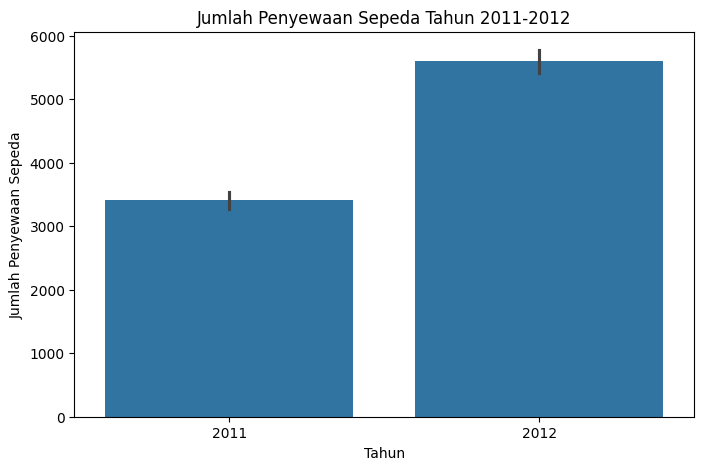

In [132]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='yr',
    y='cnt',
    data=day_df)

plt.title('Jumlah Penyewaan Sepeda Tahun 2011-2012')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Dari bar chart di atas dapat dilihat bahwa jumlah penyewaan sepeda pada tahun 2012 lebih tinggi dibanding 2011, sehingga dapat disimpulkan bahwa terjadi peningkatan jumlah penyewaan sepeda dari tahun 2011-2012.

### Pertanyaan 2: Berapa persen pengguna yang sudah terdaftar dan tidak dari keseluruhan pengguna?

Kita akan menjawab pertanyaan ini dengan pie chart untuk menunjukkan proporsi jumlah pengguna terdaftar dan tidak.

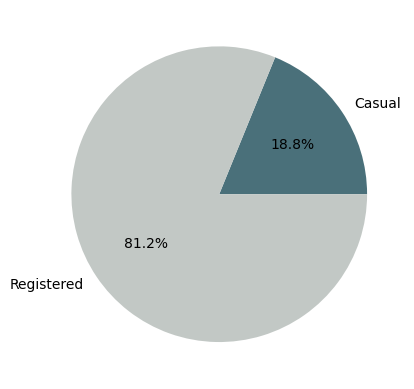

In [139]:

casual = sum(day_df['casual'])
registered = sum(day_df['registered'])
data = [casual, registered]
labels = ['Casual', 'Registered']
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#4A707A", "#C2C8C5"])
plt.show()

Dari pie chart di atas di dapat hasil bahwa sebanyak 81,8% pengguna sudah terdaftar, sedangkan sebanyak 18,8% sisanya belum terdaftar.

### Pertanyaan 3: Pada hari apa pengguna paling banyak menggunakan penyewaan sepeda?

Kita akan menjawab pertanyaan ini dengan menggunakan bar chart untuk melihat hari dengan jumlah penyewaan sepeda terbanyak.

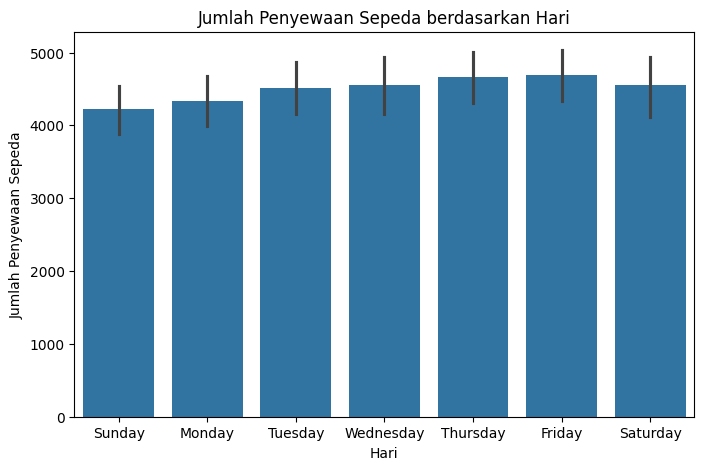

In [137]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='weekday',
    y='cnt',
    data=day_df)

plt.title('Jumlah Penyewaan Sepeda berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Dari bar chart dapat dilihat bahwa hari penyewaan sepeda paling banyak terjadi pada hari Jumat.

### Pertanyaan 4: Pada musim apa pengguna paling banyak menggunakan penyewaan sepeda?

Kita akan menjawab pertanyaan ini dengan menggunakan bar chart untuk melihat jumlah penyewaan sepeda pada masing-masing musim

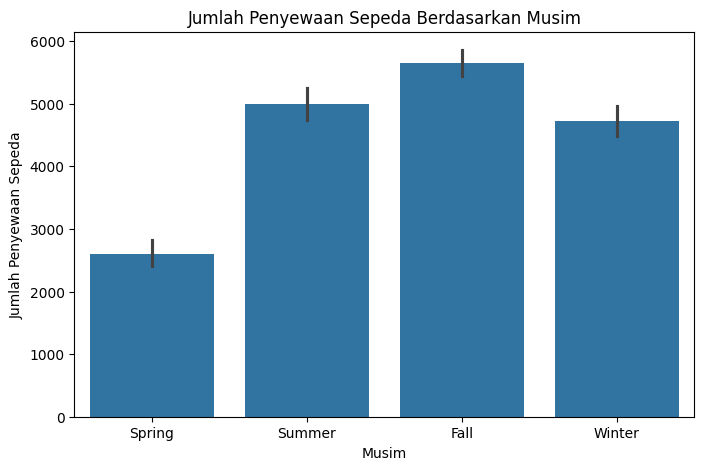

In [144]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='season',
    y='cnt',
    data=day_df)

plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Dari bar chart di atas, dapat dilihat bahwa jumlah penyewaan sepeda paling tinggi ada pada musim gugur atau Fall

## Conclusion

- Conclution pertanyaan 1: Dari bar chart yang dihasilkan didapat hasil frekuensi penyewaan sepeda pada tahun 2012 lebih tinggi dibanding tahun 2011, hal ini menunjukkan adanya peningkatan pada jumlah penyewaan sepeda dari tahun 2011 hingga tahun 2012.
- Conclution pertanyaan 2: Dari pie chart yang dihasilkan didapat hasil bahwa proporsi pengguna terdaftar sudah sebesar 81,2% sedangkan proporsi pengguna tidak terdaftar atau casual sebesar 18,8%. Dapat disimpulkan bahwa sudah lebih dari setengah dari total pengguna penyewaan sepeda ini termasuk dalam pengguna terdaftar.
- Conclution pertanyaan 3: Dari bar chart yang dihasilkan didapat hasil bahwa hari Jumat menjadi hari dengan frekuensi penyewaan sepeda terbanyak dibanding hari lainnya. Selain itu kita juga dapat melihat bahwa hari Minggu merupakan hari dengan frekuensi penyewaan sepeda paling sedikit dibanding hari lainnya.
- Conclution pertanyaan 4: Dari bar chart yang dihasilkan didapat hasil bahwa para pengguna paling banyak menyewa sepeda pada musim gugur atau Fall. Selain itu, dapat dilihat pula bahwa pengguna paling sedikit menyewa sepeda pada musim semi atau Spring.